# INSIGHTS
This Jupyter notebook includes some code to generate insights on what we learnt from the data. We will use a package called NLTK to perform sentiment analysis.

GRAPHS AND PLOTS
We will then use a package called matplotlib to perform plot charts and graphs

In [1]:
# Creating a new column called 'SENTIMENT' that contains the sentiment scores of each review using nltk
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Read in the reviews data from a CSV file
sentiment_analysis_df = pd.read_csv(r"data\sentiment_content.csv")

In [4]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
sentiment_analysis_df['SENTIMENT'] = sentiment_analysis_df['CONTENT'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_df

,CONTENT,SENTIMENT
0,Not Verified | It seems that there is a race t...,-0.6353
1,Not Verified | As a Spanish born individual l...,0.8351
2,"A rather empty and quiet flight to Tel Aviv, v...",0.3597
3,Easy check in and staff member was polite and ...,0.9612
4,Being a silver flyer and booking a flight thro...,-0.1306
...,...,...
1995,A mediocre service on this airline flying from...,0.3474
1996,MAN to LHR with personable crew who did the br...,0.9727
1997,London to Bucharest with British Airways. The ...,-0.3923
1998,Shambolic check-in at New York JFK following t...,0.1147


In [5]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
sentiment_analysis_df['SENTIMENT_TYPE'] = sentiment_analysis_df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,CONTENT,SENTIMENT,SENTIMENT_TYPE
0,Not Verified | It seems that there is a race t...,-0.6353,negative
1,Not Verified | As a Spanish born individual l...,0.8351,positive
2,"A rather empty and quiet flight to Tel Aviv, v...",0.3597,positive
3,Easy check in and staff member was polite and ...,0.9612,positive
4,Being a silver flyer and booking a flight thro...,-0.1306,negative
...,...,...,...
1995,A mediocre service on this airline flying from...,0.3474,positive
1996,MAN to LHR with personable crew who did the br...,0.9727,positive
1997,London to Bucharest with British Airways. The ...,-0.3923,negative
1998,Shambolic check-in at New York JFK following t...,0.1147,positive


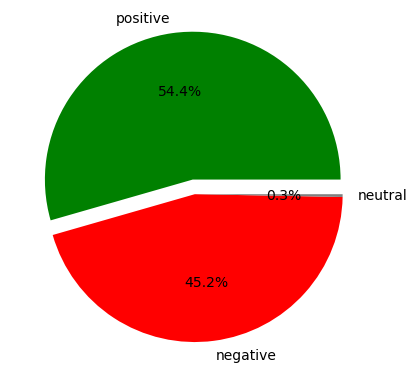

In [6]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = sentiment_analysis_df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

Sentiment
Out of 2000 reviews, 1096 were positive, 898 were negative and 6 were neutral. This means the majority of reviews were polarised as either positive or negative

In [7]:
#Saving the new data into a csv
sentiment_analysis_df.to_csv(r"data\Cleaned_BA_reviews.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


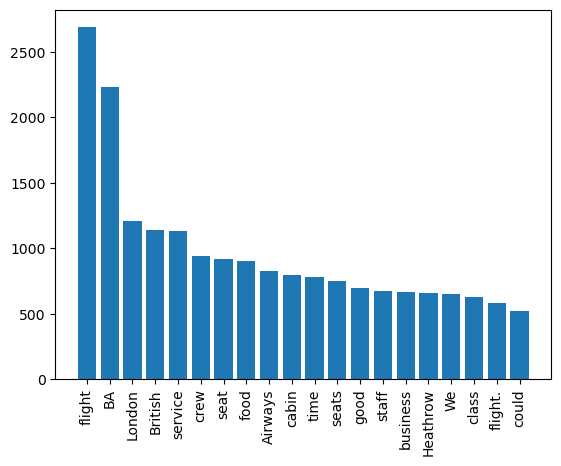

In [8]:

nltk.download('stopwords')
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = sentiment_analysis_df['CONTENT']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

Key topics
The frequency chart below shows that the key topics within the reviews include “flight”, “London”, “service” and “crew”, showing that people are actively talking about their experience and staff

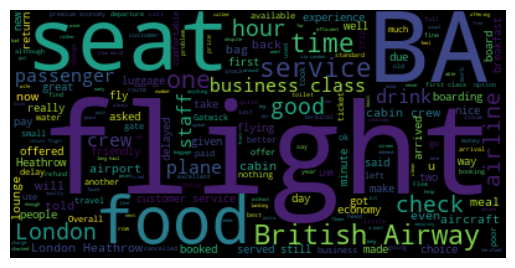

In [9]:
# Import the necessary libraries
!pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(sentiment_analysis_df['CONTENT']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()